# Setup

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Data

In [20]:
datasets = ["arc130", "1138_bus", "bcsstk13", "darcy003", "af_1_k101", "cage15"]
nnz = [1282, 2596, 42943, 1_167_685, 9_027_150, 99_199_551]

cpu_means = [18.2, 36.8, 206.94, 5647.9, 35951.8, 445202]
cpu_sorted_means = [19.29, 38.1, 182.37, 5606.2, 37606.5, 446962]
gpu_means = [65.5, 67.4, 64.67, 273.84, 858.36, 12594.1]

cpu_stds =  [0.4, 0.4, 4.9, 21.31, 275.7, 11920]
cpu_sorted_stds = [0.46, 0.54, 3.23, 115.0, 345.9, 8555.7]
gpu_stds = [2.39, 3.8, 4.49, 11.5, 43.68, 23.2]

cpu_o1_means = [4.09, 9.49, 94.1, 1697.2, 9866.3, 130970]
cpu_o1_stds = [0, 0.5, 7.88, 21.3, 41.3, 10946]
cpu_o1_sorted_means = [8, 9.59, 127.05, 1806.3, 16897.4, 219943]
cpu_o1_sorted_stds = [0, 0.49, 6.4, 11.6, 71.7, 13522]

cpu_o2_means = [3.56, 8.79, 70.06, 1723.1, 9800.1, 133023]
cpu_o2_stds = [0.49, 0.4, 6.25, 15.43, 61.8, 6342]
cpu_o2_sorted_means = [7.09, 9.69, 125.7, 1812.5, 17028.5, 213132]
cpu_o2_sorted_stds = [0.3, 0.46, 5.4, 17.12, 53.3, 13092]

cpu_o3_means = [4, 8.39, 95.7, 1742.8, 9750.6, 131913]
cpu_o3_stds = [0, 0.49, 7.74, 19.1, 29.9, 6272]
cpu_o3_sorted_means = [7.78, 10.69, 129.6, 1789.5, 16934.4, 224215]
cpu_o3_sorted_stds = [0.4, 0.46, 4.78, 20.1, 81.4, 14028]

# OpenMP Results
omp_means = [
    [1.74, 3.27, 27.7, 1785.1, 13259.9, 130953],  # OMP 2
    [2.28, 4.47, 24.5, 2024.1, 12486.1, 136757],  # OMP 3
    [2.42, 5.16, 19, 2612.1, 13390, 132778],      # OMP 4
    [2.65, 6.28, 21.8, 3493.1, 13524, 123888],    # OMP 5
    [3.25, 6.55, 21.6, 3695.1, 13654, 123459]     # OMP 6
]

omp_stds = [
    [0.4, 0.46, 2.44, 246.8, 361.5, 4954],  # OMP 2
    [0.91, 0.5, 0.67, 491.2, 538.6, 6494],  # OMP 3
    [1.2, 0.6, 0.63, 236.9, 236.8, 2885],   # OMP 4
    [0.98, 0.46, 0.4, 434.3, 286.5, 3075],  # OMP 5
    [0.64, 0.8, 0.92, 479.5, 280.1, 1571]   # OMP 6
]

cluster_means = [1, 2, 33.8, 1457.6, 8893.8, 105299.6]
cluster_stds = [0, 0, 0.4, 11.7, 29, 261.3]
cluster_sorted_means = [1.6, 2.26, 65, 1406.3, 12711, 151121.4]
cluster_sorted_stds = [0.46, 0.46, 0, 7.85, 13.2, 439.8]
cluster_gpu_means = [10.35, 8.46, 21.8, 82.73, 317.2, 4353.7]
cluster_gpu_stds = [1.98, 0.49, 0.44, 1.55, 1.11, 4.91]

# Config

In [21]:
local = True

# Chart CPU Optimizations

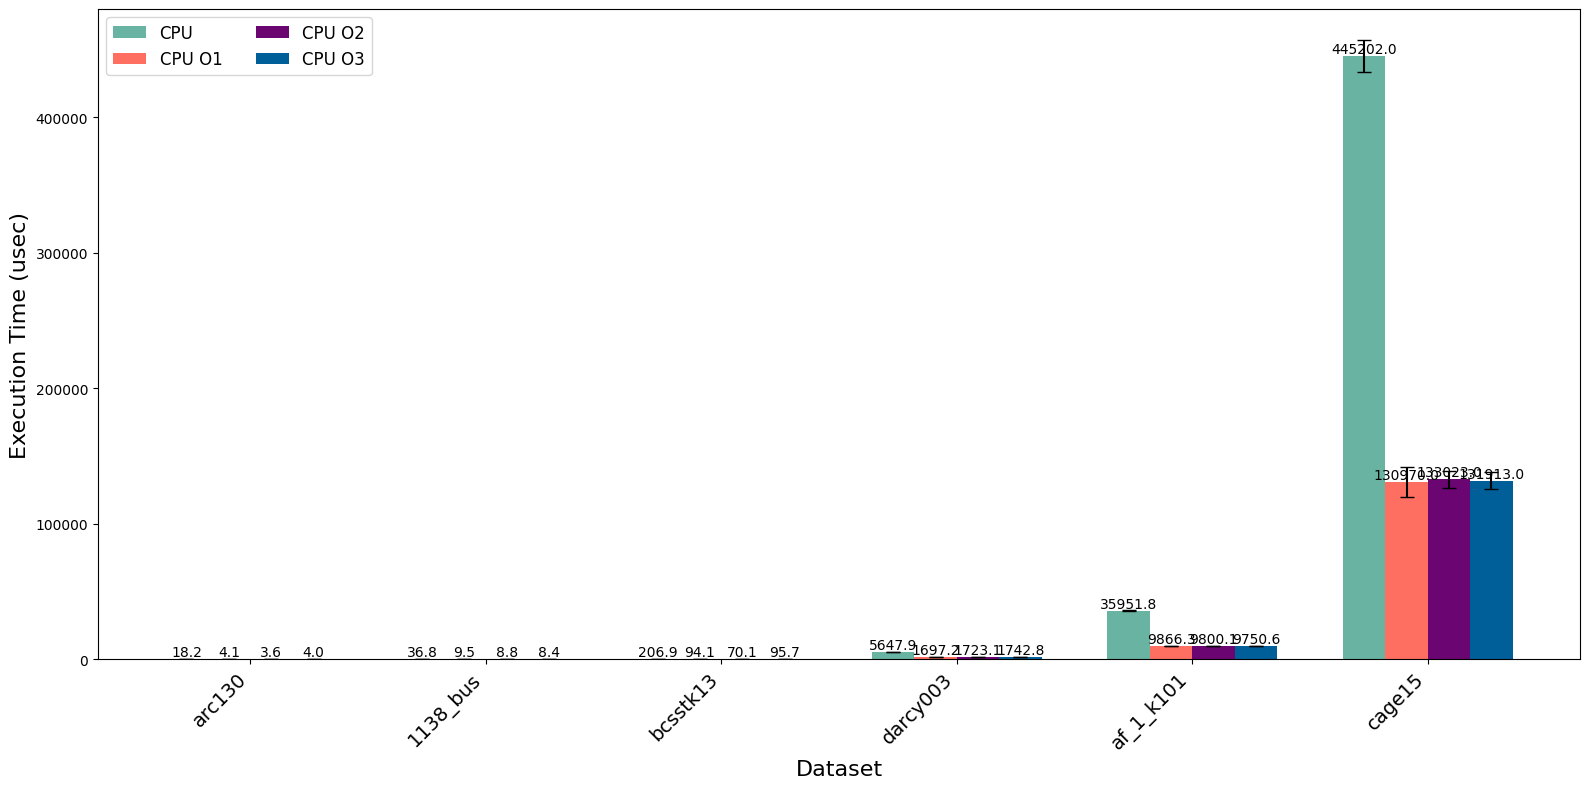

In [22]:
# Set up bar positions
x = np.arange(len(datasets))
width = 0.18  # Narrower for more groups

fig, ax = plt.subplots(figsize=(16, 8))

# Plot bars
bars1 = ax.bar(x - 1.5 * width, cpu_means, width, yerr=cpu_stds, capsize=5, label='CPU', color='#69b3a2')
bars2 = ax.bar(x - 0.5 * width, cpu_o1_means, width, yerr=cpu_o1_stds, capsize=5, label='CPU O1', color='#ff6f61')
bars3 = ax.bar(x + 0.5 * width, cpu_o2_means, width, yerr=cpu_o2_stds, capsize=5, label='CPU O2', color='#6a0572')
bars4 = ax.bar(x + 1.5 * width, cpu_o3_means, width, yerr=cpu_o3_stds, capsize=5, label='CPU O3', color='#005f99')

# Add titles and labels
# ax.set_title("Mean Execution Times with Standard Deviations (No GPU)", fontsize=18)
ax.set_xlabel("Dataset", fontsize=16)
ax.set_ylabel("Execution Time (usec)", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=12, ncol=2)

# Add value labels
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.1f}", ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Chart

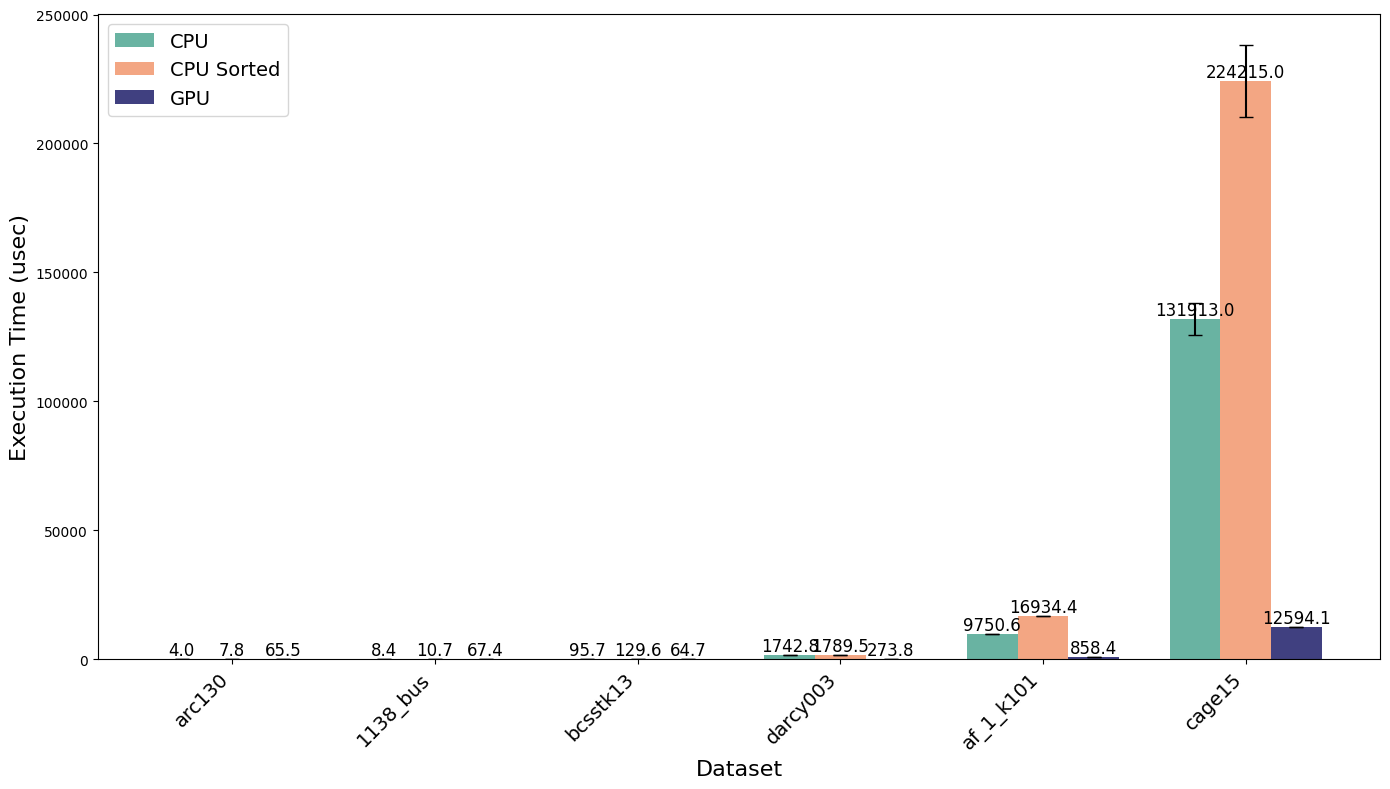

In [23]:
# Set up bar positions
x = np.arange(len(datasets))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Get correct data
cpu_m = cpu_o3_means if local else cluster_means
cpu_s = cpu_o3_stds if local else cluster_stds
cpu_sorted_m = cpu_o3_sorted_means if local else cluster_sorted_means
cpu_sorted_s = cpu_o3_sorted_stds if local else cluster_sorted_stds
gpu_m = gpu_means if local else cluster_gpu_means
gpu_s = gpu_stds if local else cluster_gpu_stds

# Plot bars
bars1 = ax.bar(x - width, cpu_m, width, yerr=cpu_s, capsize=5, label='CPU', color='#69b3a2')
bars2 = ax.bar(x, cpu_sorted_m, width, yerr=cpu_sorted_s, capsize=5, label='CPU Sorted', color='#f3a683')
bars3 = ax.bar(x + width, gpu_m, width, yerr=gpu_s, capsize=5, label='GPU', color='#404080')

# Add titles and labels
# ax.set_title("Mean Execution Times", fontsize=18)
ax.set_xlabel("Dataset", fontsize=16)
ax.set_ylabel("Execution Time (usec)", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=14)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.1f}", ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Bandwidth

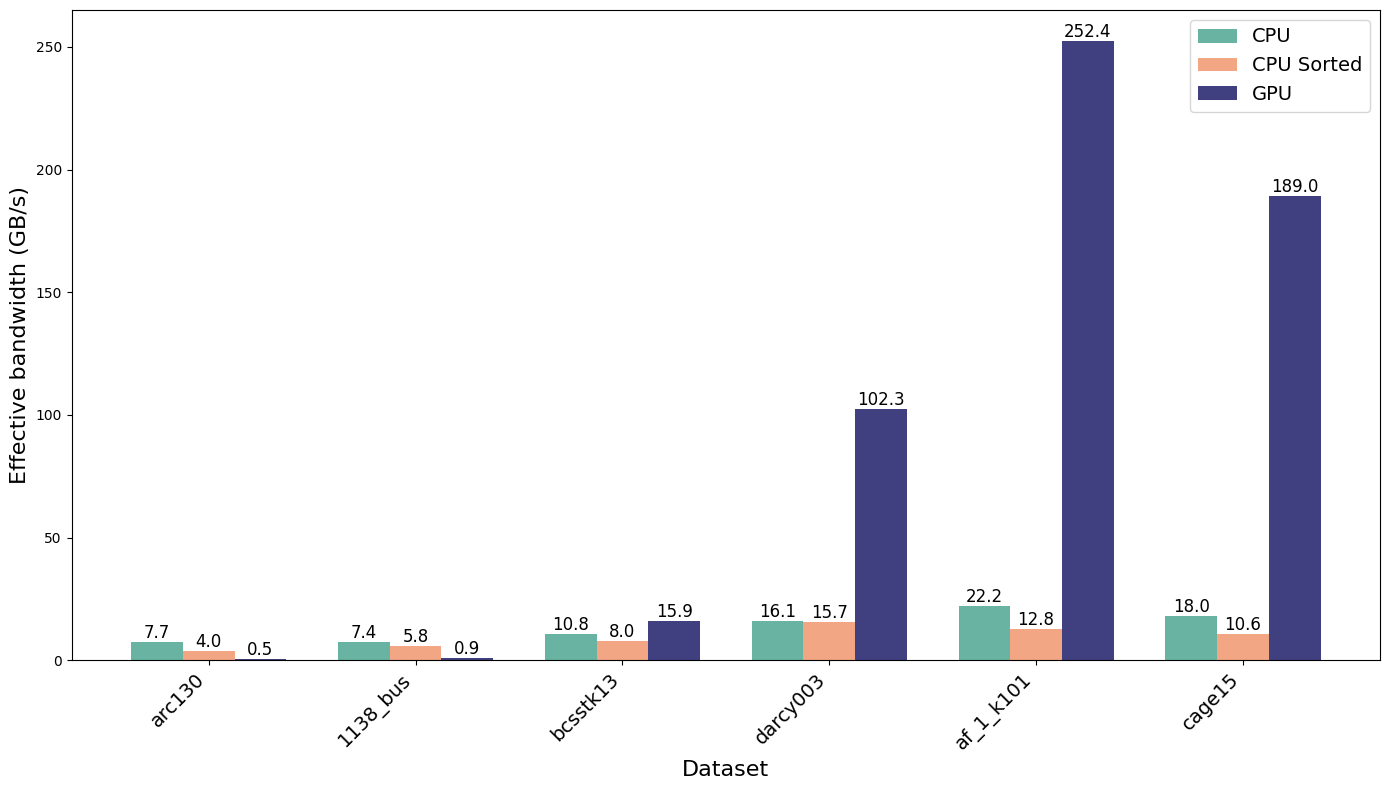

In [24]:
bytes_rw = 24

bytes_total = [el * bytes_rw for el in nnz]

flops_cpu = [b / t / 1000 for b, t in zip(bytes_total, cpu_o3_means if local else cluster_means)]
flops_cpu_sorted = [b / t / 1000 for b, t in zip(bytes_total, cpu_o3_sorted_means if local else cluster_sorted_means)]
flops_gpu = [b / t / 1000 for b, t in zip(bytes_total, gpu_means if local else cluster_gpu_means)]

# Set up bar positions
x = np.arange(len(datasets))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
bars1 = ax.bar(x - width, flops_cpu, width, label='CPU', color='#69b3a2')
bars2 = ax.bar(x, flops_cpu_sorted, width, label='CPU Sorted', color='#f3a683')
bars3 = ax.bar(x + width, flops_gpu, width, label='GPU', color='#404080')

# Add titles and labels
# ax.set_title("Effective bandwidth", fontsize=18)
ax.set_xlabel("Dataset", fontsize=16)
ax.set_ylabel("Effective bandwidth (GB/s)", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=14)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.1f}", ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# FLOPS

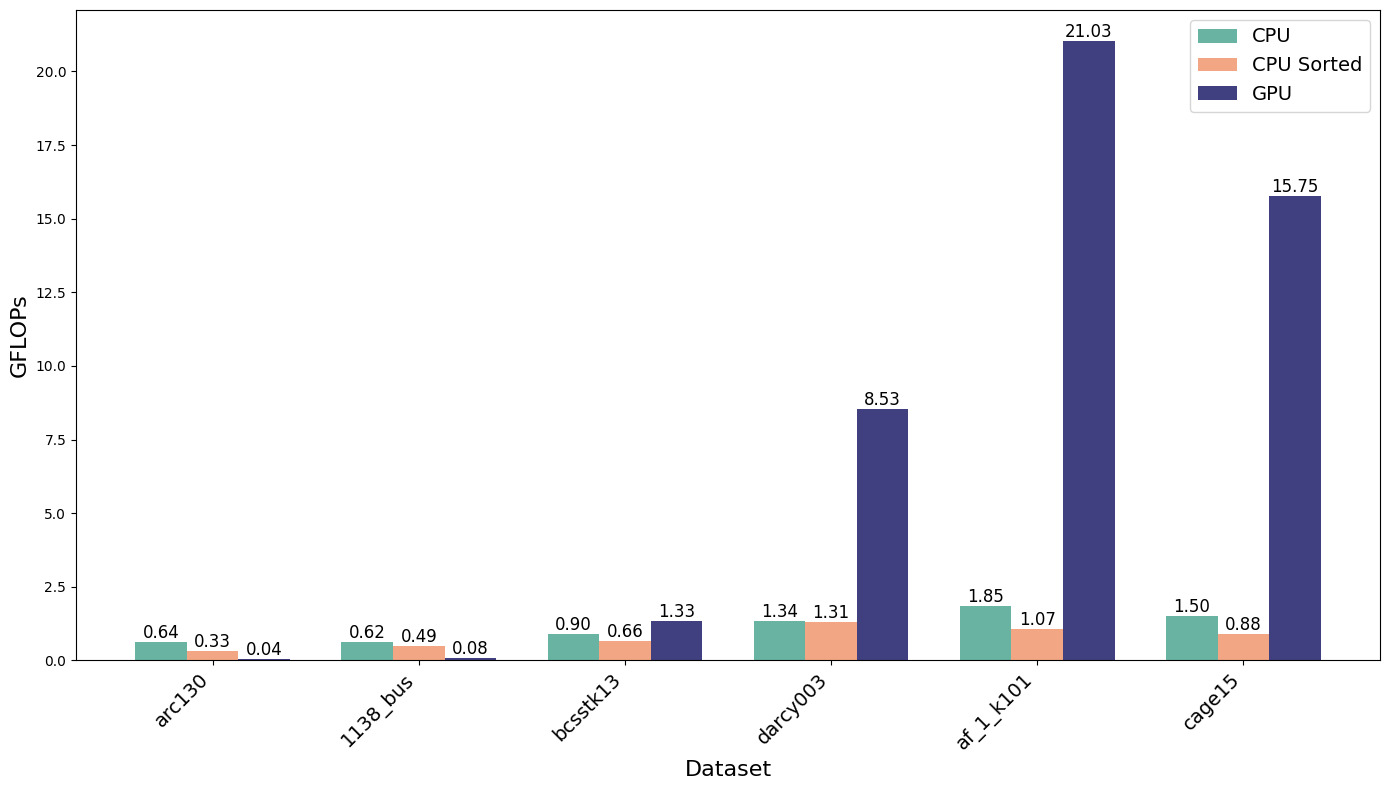

In [25]:
operations = 2

op_total = [el * operations for el in nnz]

flops_cpu = [o / t / 1000 for o, t in zip(op_total, cpu_o3_means if local else cluster_means)]
flops_cpu_sorted = [o / t / 1000 for o, t in zip(op_total, cpu_o3_sorted_means if local else cluster_sorted_means)]
flops_gpu = [o / t / 1000 for o, t in zip(op_total, gpu_means if local else cluster_gpu_means)]

# Set up bar positions
x = np.arange(len(datasets))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plot bars
bars1 = ax.bar(x - width, flops_cpu, width, label='CPU', color='#69b3a2')
bars2 = ax.bar(x, flops_cpu_sorted, width, label='CPU Sorted', color='#f3a683')
bars3 = ax.bar(x + width, flops_gpu, width, label='GPU', color='#404080')

# Add titles and labels
# ax.set_title("Effective bandwidth", fontsize=18)
ax.set_xlabel("Dataset", fontsize=16)
ax.set_ylabel("GFLOPs", fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=45, ha="right", fontsize=14)
ax.legend(fontsize=14)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# OpenMP

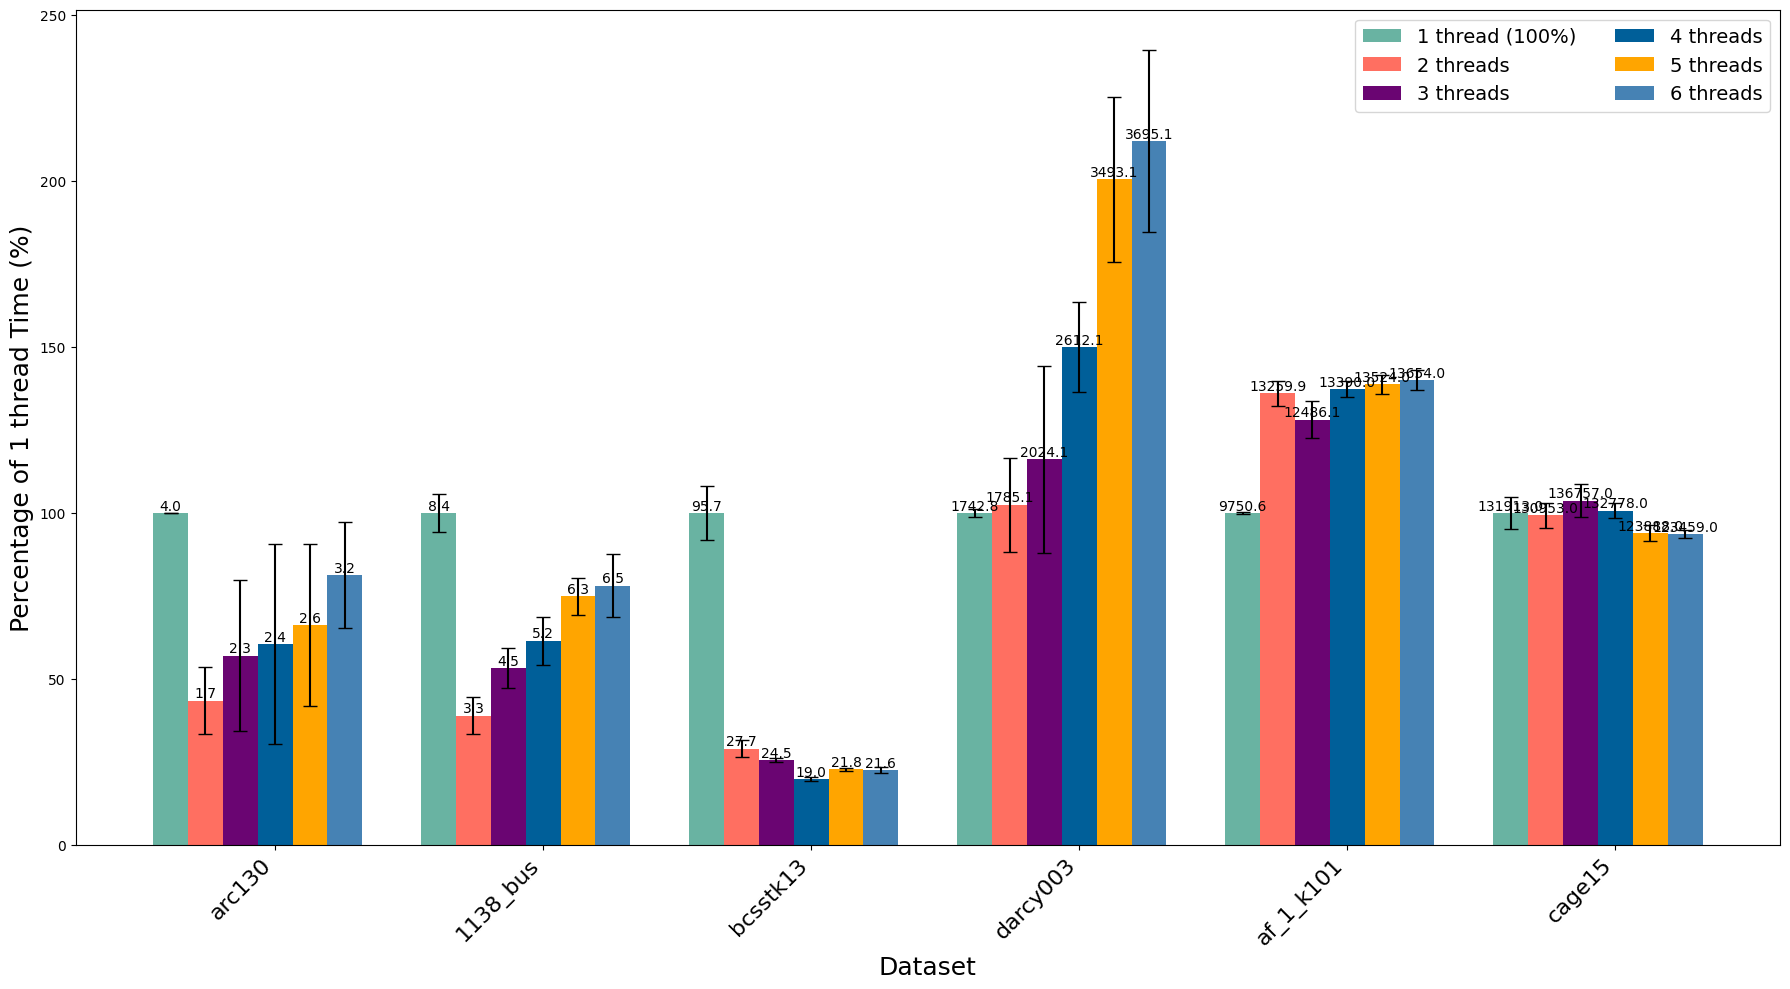

In [31]:
omp_labels = ["2 threads", "3 threads", "4 threads", "5 threads", "6 threads"]

# Set up bar positions
x = np.arange(len(datasets))
width = 0.13  # Narrower for more groups

fig, ax = plt.subplots(figsize=(18, 10))

# Plot the reference (CPU O3) as 100%
cpu_o3_percentages = [100] * len(cpu_o3_means)
cpu_o3_std_percentages = [(s / m) * 100 for s, m in zip(cpu_o3_stds, cpu_o3_means)]
bars_ref = ax.bar(x - 3 * width, cpu_o3_percentages, width, yerr=cpu_o3_std_percentages, capsize=5, label="1 thread (100%)", color='#69b3a2')

# Add exact value labels for the reference
for bar, mean, std in zip(bars_ref, cpu_o3_means, cpu_o3_std_percentages):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{mean:.1f}", ha='center', va='bottom', fontsize=10)

# Plot OMP results as percentages but show exact values
colors = ['#ff6f61', '#6a0572', '#005f99', '#ffa500', '#4682b4']
for i, (means, stds, label, color) in enumerate(zip(omp_means, omp_stds, omp_labels, colors)):
    # Calculate percentage
    percentages = [(m / ref) * 100 for m, ref in zip(means, cpu_o3_means)]
    std_percentages = [(s / ref) * 100 for s, ref in zip(stds, cpu_o3_means)]
    
    # Corrected offset for each OMP group
    bars = ax.bar(x - 2 * width + i * width, percentages, width, yerr=std_percentages, capsize=5, label=label, color=color)

    # Add exact value labels
    for bar, exact_value, std in zip(bars, means, std_percentages):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, f"{exact_value:.1f}", ha='center', va='bottom', fontsize=10)

# Add titles and labels
# ax.set_title("Execution Times as Percentage of CPU O3", fontsize=20)
ax.set_xlabel("Dataset", fontsize=18)
ax.set_ylabel("Percentage of 1 thread Time (%)", fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=45, ha="right", fontsize=16)
ax.legend(fontsize=14, ncol=2)

# Show the plot
plt.tight_layout()
plt.show()